In [ ]:
import pandas as pd

#importando biblioteca de gráficos

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#importando dataframe

df = pd.read_csv('dataset_life_expectancy.csv')


# Análise Descritiva

Verificamos a regra definina para a Expectativa de vida e ela segue a seguinte classificação:

- Alta: Expectativa de vida a partir de  63 anos
- Baixa: Expectativa de vida até (inclusive) 63 anos

In [52]:
# Classificação sendo armarzenada na coluna 'class'

df.loc[(df['Life expectancy ']<=63) & (df['Life expectancy '].isnull() == False), 'class'] = 'Baixa'
df.loc[(df['Life expectancy ']>63) & (df['Life expectancy '].isnull() == False), 'class'] = 'Alta'
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,class
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,Alta
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,Baixa
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,Baixa
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,Baixa
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,Baixa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,Baixa
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,Baixa
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,Baixa
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,Baixa


**Avaliando a distribuição dos dados em histograma**

<AxesSubplot: xlabel='Life expectancy ', ylabel='Count'>

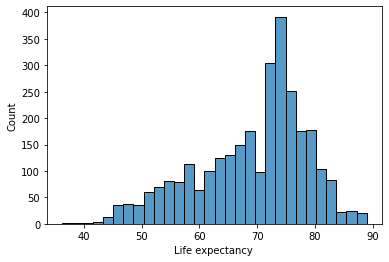

In [3]:
# Base completa

sns.histplot(
data=df,
x='Life expectancy '
)

<AxesSubplot: xlabel='Life expectancy ', ylabel='Count'>

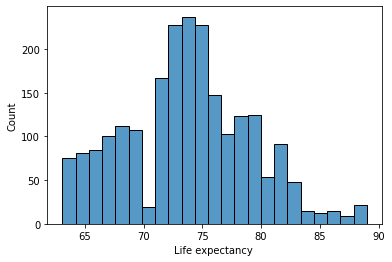

In [37]:
#Expectativa Alta

df_alta =df.loc[df['class']== "Alta"]

sns.histplot(
data=df_alta,
x='Life expectancy '
)

<AxesSubplot: xlabel='Life expectancy ', ylabel='Count'>

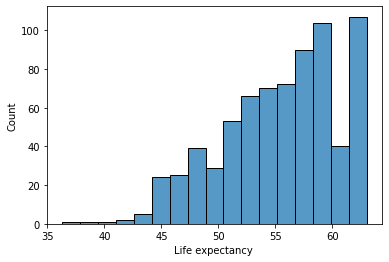

In [39]:
#Expectativa Baixa

df_baixa = df.loc[df['class']== "Baixa"]

sns.histplot(
data=df_baixa,
x='Life expectancy '
)

**Avaliando Qualidade dos dados pelo Boxplot**

<AxesSubplot: xlabel='Life expectancy '>

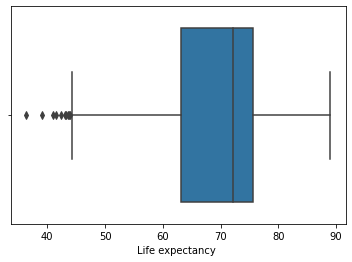

In [6]:
#Plotando boxplot da expectativa de vida

sns.boxplot(x=df["Life expectancy "])

<AxesSubplot: xlabel='Life expectancy '>

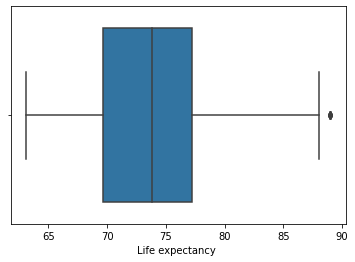

In [7]:
#Plotando boxplot da expectativa de vida Alta

df_filtered = df.loc[df['class'] == 'Alta']
sns.boxplot(x = df_filtered["Life expectancy "])

<AxesSubplot: xlabel='Life expectancy '>

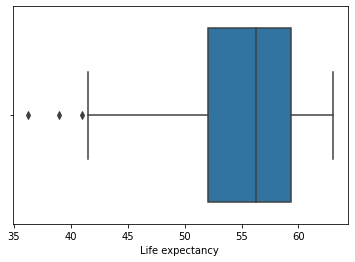

In [8]:
#Plotando boxplot da expectativa de vida Baixa

df_filtered = df.loc[df['class'] == 'Baixa']
sns.boxplot(x = df_filtered["Life expectancy "])

**Avaliação da qualidade dos dados**

Verificamos que a distribuição das espectativa de vida está com uma inclinação leve a direita
Avaliando para as diferentes classificações percebemos que:
- A base de expectativas altas possui uma distribuição que se aproxima da normal.
- Os dados para expectativas baixas possuem forte inclinação a direita


Afim de ter uma visão mais clara sobre os dados será feito o tratamento do dataset para avaliar a influencia dos outliers nos resultados obtidos.  

In [10]:
# Removendo os outliers
life_expectancy = df['Life expectancy ']

quartil_1 = life_expectancy.quantile(0.25)
quartil_2 = life_expectancy.quantile(0.75)
inter_quartil = quartil_2 - quartil_1
lim_inferior = quartil_1 - 1.5*inter_quartil
lim_superior = quartil_2 + 1.5*inter_quartil

tratamento = (life_expectancy > lim_inferior) & (life_expectancy < lim_superior)

df_tratado = df[tratamento]

**Histograma e Boxplot para a dataset com a remoção dos outliers**

<AxesSubplot: xlabel='Life expectancy ', ylabel='Count'>

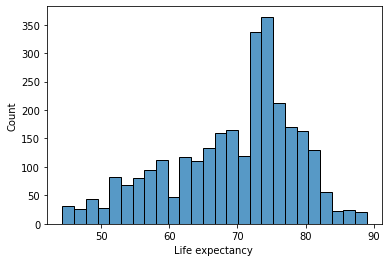

In [40]:
sns.histplot(
data= df_tratado,
x='Life expectancy '
)

<AxesSubplot: xlabel='Life expectancy '>

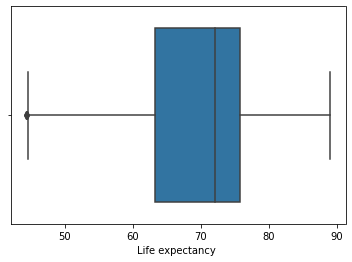

In [24]:
sns.boxplot(x=df_tratado["Life expectancy "])

Notamos que a influencia dos outliers na qualidade dos dados é baixa pois a estrutura de distribuição é pouco alterada

# Análise Diagnóstica

Para analisar o comportamento da expectativa de vida e quais fatores presentes em nossa base são importantes usaremos o seguinte método estatístico:
- **Correlação:** Usaremos os metódos Spearman, Pearson e Kendall para avaliar as variáveis que possuem o maior grau de interação numérica nessa base. Com isso analisaremos mais profundamente aquelas que tiverem o indice de correlação maior que 0,5.
- Em seguida usaremos as tecnicas de **regressão linear** para identificar quais dessas variáveis possuem a menor grau de dispersão.
- Seguiremos nesse estudo avaliando o comportamento das médias de expectativia de vida por país e por ano para observar os efeitos desses indicadores e como que os resultados podem indicar algum tipo de causalidade.

In [13]:
# Verificando correlações entre as variáveis

correl_pearson = df.corr(method='pearson')
correl_kendall = df.corr(method='kendall')
correl_spearman = df.corr(method='spearman')


In [25]:
# Encontrando variaveis com correlação Pearson absoluta maior que 0,5
df_vars_pearson = correl_pearson[abs(correl_pearson['Life expectancy ']) > 0.5]
key_var_pearson = df_vars_pearson.index

In [15]:
# Verificando correlação Pearson entre as variáveis com a base tratada, temos:

correl_tratado = df_tratado.corr()

# Encontrando variaveis com coorelaçãço absoluta maior que 0,5
df_vars_tratado = correl_tratado[abs(correl_tratado['Life expectancy ']) > 0.5]
key_var_tratado = df_vars_tratado.index
display(df_vars_tratado)

# A diferença das correlações nas duas bases é pouco significativa. O que faz ser possível utilizar toda a população para a nossa análise.

# Criando dataset com as variaveis encontradas

dataset_pearson = df[key_var_pearson]


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Life expectancy,0.162623,1.000000,-0.694971,-0.199008,0.407875,0.383961,0.256420,-0.159187,0.568008,-0.224684,0.466325,0.238911,0.477856,-0.555753,0.463623,-0.023220,-0.481257,-0.475686,0.725158,0.754594
Adult Mortality,-0.072481,-0.694971,1.000000,0.079476,-0.196384,-0.243772,-0.162740,0.029374,-0.387285,0.094478,-0.274315,-0.127414,-0.271206,0.523931,-0.296796,-0.013150,0.306949,0.312664,-0.457020,-0.455151
BMI,0.100838,0.568008,-0.387285,-0.227668,0.337433,0.230431,0.154884,-0.176102,1.000000,-0.237945,0.286509,0.245539,0.283968,-0.240350,0.303283,-0.072680,-0.530814,-0.537839,0.507188,0.557192
HIV/AIDS,-0.132354,-0.555753,0.523931,0.024421,-0.045762,-0.097361,-0.112601,0.029187,-0.240350,0.036944,-0.161700,-0.000553,-0.161360,1.000000,-0.135335,-0.027648,0.202333,0.205850,-0.246579,-0.222391
Income composition of resources,0.239261,0.725158,-0.457020,-0.145215,0.450331,0.381788,0.198826,-0.129630,0.507188,-0.163170,0.379118,0.176388,0.398705,-0.246579,0.459807,-0.009292,-0.422337,-0.410943,1.000000,0.799280
Schooling,0.210576,0.754594,-0.455151,-0.195535,0.548789,0.391066,0.222743,-0.138583,0.557192,-0.211102,0.414693,0.273328,0.422240,-0.222391,0.449166,-0.032569,-0.478106,-0.466963,0.799280,1.000000


In [26]:
# Encontrando variaveis com correlação Kendall absoluta maior que 0,5
df_vars_kendall = correl_kendall[abs(correl_kendall['Life expectancy ']) > 0.5]
key_var_kendall = df_vars_kendall.index

# Criando dataset com as variaveis encontradas

dataset_kendall = df[key_var_kendall]



In [27]:
# Encontrando variaveis com correlação Spearman absoluta maior que 0,5
df_vars_spearman = correl_spearman[abs(correl_spearman['Life expectancy ']) > 0.5]
key_var_spearman = df_vars_spearman.index

# Criando dataset com as variaveis encontradas

dataset_var_spearman = df[key_var_spearman]

In [18]:
# Juntando todas as tabelas relevantes para as correlações encontradas acima

list_var = key_var_kendall.append([key_var_pearson, key_var_spearman])
list_var = list_var.drop_duplicates()


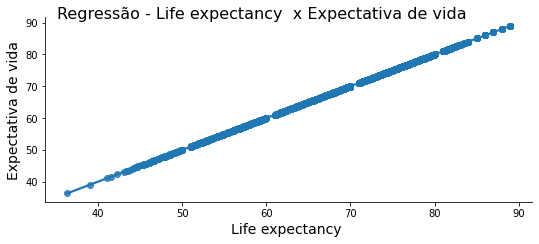

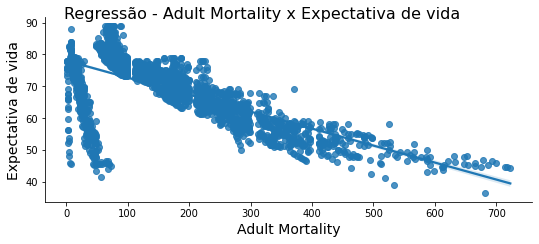

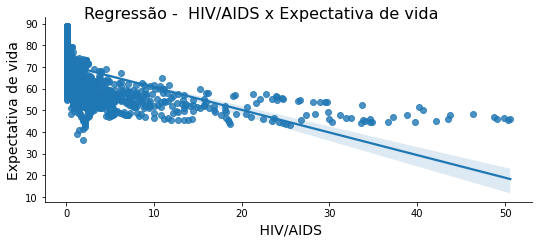

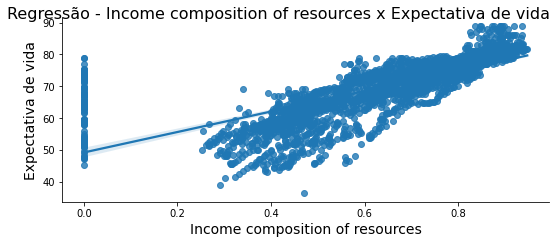

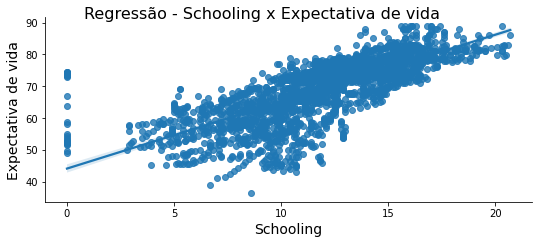

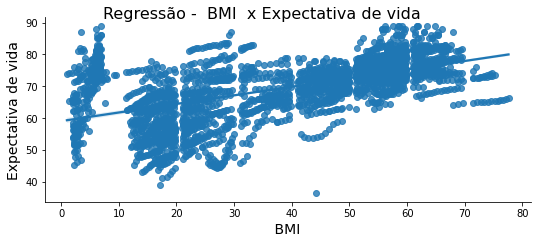

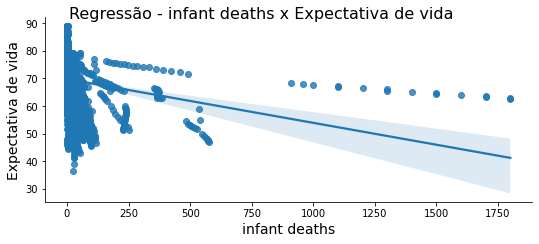

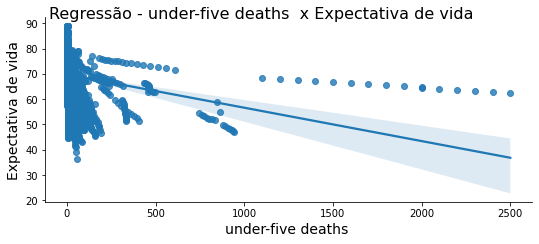

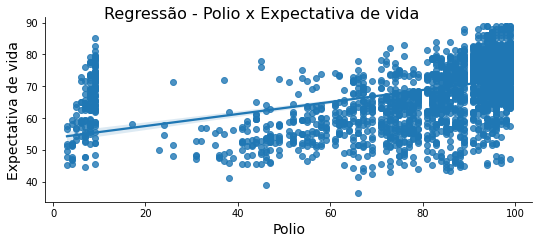

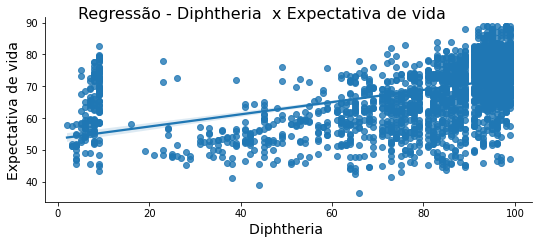

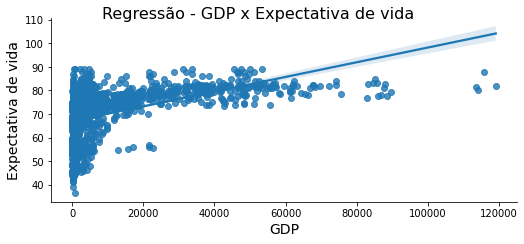

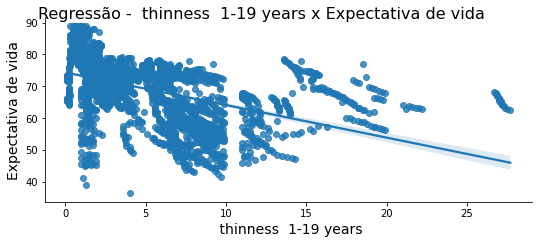

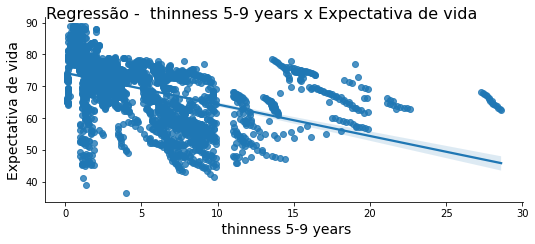

In [36]:
# Plotando Graficos de Regressão para cada uma das variáveis

# Função para plotar os gráficos

def regressao (dataset, variavel):
    ax = sns.lmplot(y="Life expectancy ", x=variavel , data=dataset)
    ax.fig.set_size_inches(8, 3)
    ax.fig.suptitle(f'Regressão - {variavel} x Expectativa de vida', fontsize=16, y=1.02)
    ax.set_xlabels(variavel, fontsize=14)
    ax.set_ylabels("Expectativa de vida", fontsize=14)
    return ax

def pairplot_chart (dataset, variavel):
    ax = sns.pairplot(y_vars ="Life expectancy ", x_vars= variavel, data=dataset, kind='reg')
    
    return ax

for var in list_var:
    regressao(df , var)



Pela analise da regressão linear das variáveis que analisamos vemos que:

- Adult Mortality, Income composiion of resources, Schooling e BMI possuem um comportamento regular para os registros que possuimos.
- Dessas, Adult Mortality apresenta uma relação linear negativa e acentuada.

Sigamos com a análise avaliando as médias por País


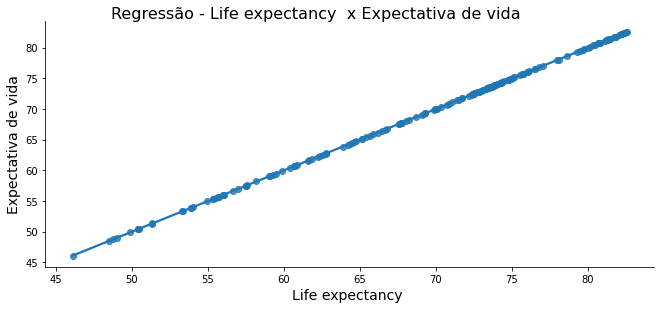

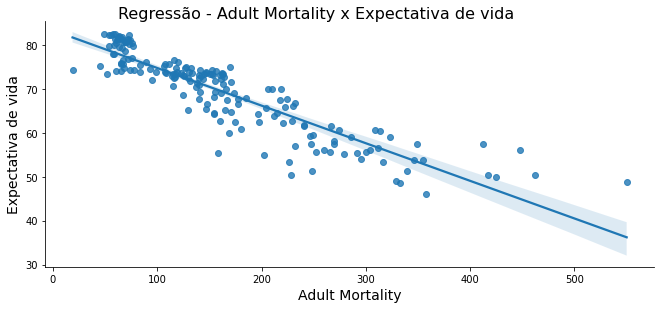

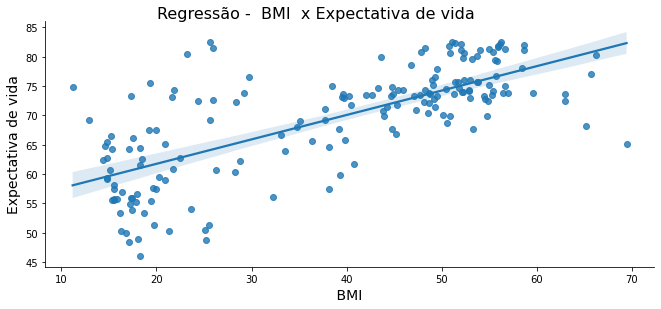

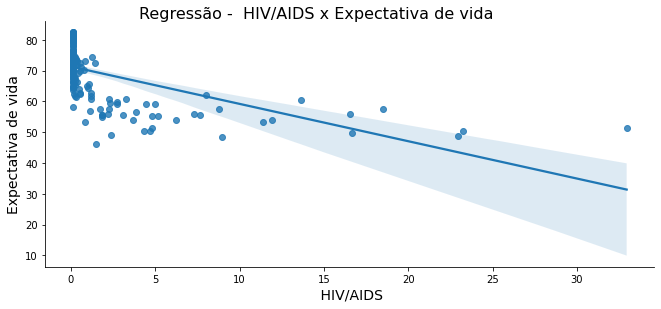

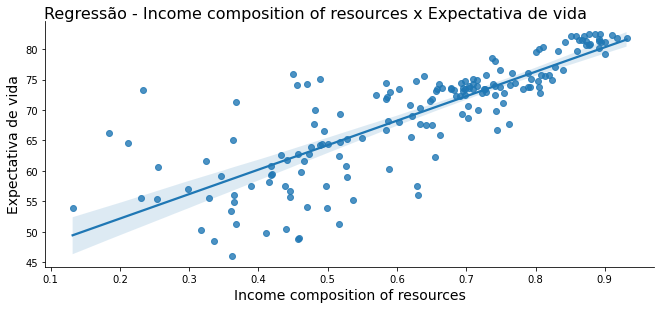

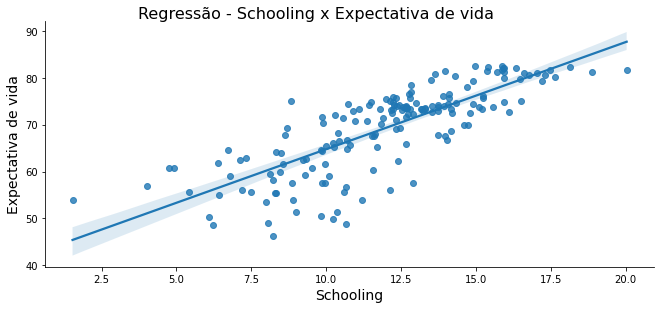

In [20]:
# Plotando a regressão para o dataset de médias para os Países
media = df.groupby('Country').mean()

media_pearson = df.corr(method='pearson')
var_media = media_pearson[abs(media_pearson['Life expectancy ']) > 0.5]
lista_de_variaveis = var_media.index


for var in lista_de_variaveis:
    regressao(media , var)


Conseguimos observar que as tendências e comportamento dos indicadores destacados anteriormente seguem para a avaliação por países o que nos permite inferir que as relações entre essas variáveis e a expectativa de vida são **próximas**.

Vamos estudar agora o comportamento desses indicadores com os anos:

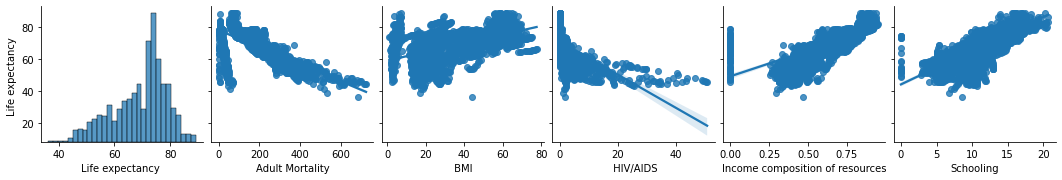

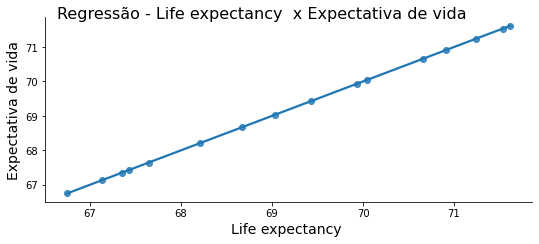

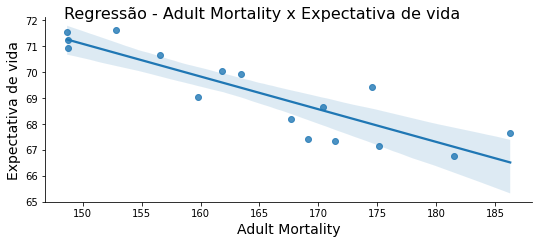

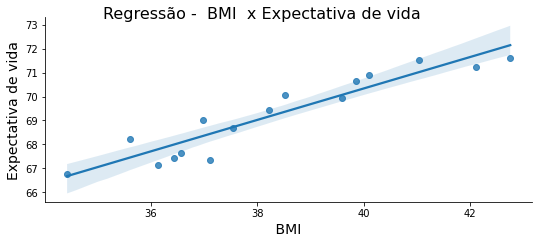

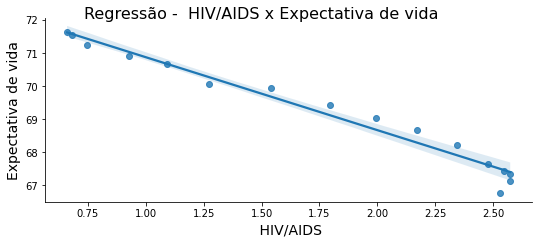

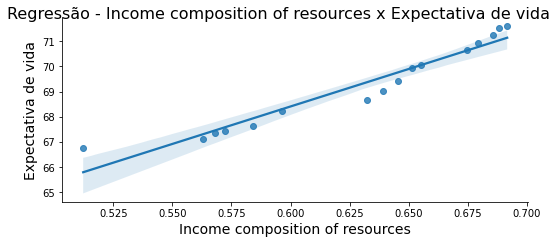

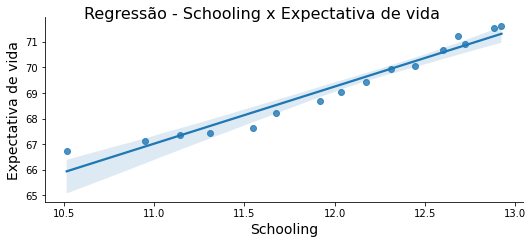

In [47]:
# Plotando a regressão para o dataset de médias para os Anos
ano = df.groupby('Year').mean()

ano_pearson = df.corr(method='pearson')
var_ano = ano_pearson[abs(ano_pearson['Life expectancy ']) > 0.5]
lista_de_variaveis_ano = var_ano.index

for var in lista_de_variaveis_ano:
    regressao(ano , var)

Analisando a média por ano vemos mais uma confirmação que esses indicadores possuem uma relação bem aproximada. Nesa visualização conseguimos notar que houve uma linearidade superior as visões anteriores o que nos faz entender que de maneira geral que a variação do resultado desses indicadores ao longo dos anos é baixa.
